# **Some blocks to use**

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
     Step  replication/seed  total_adapted_households  \
0       0               4.5                       9.0   
1       1               4.5                      10.8   
2       2               4.5                      12.4   
3       3               4.5                      14.0   
4       4               4.5                      15.2   
..    ...               ...                       ...   
395   395               4.5                     143.6   
396   396               4.5                     143.5   
397   397               4.5                     143.6   
398   398               4.5                     143.7   
399   399               4.5                     144.1   

     total_dryproofed_households  total_wetproofed_households  \
0                            3.2                          5.8   
1                            3.8                          7.0   
2                            4.4                          8.0   
3                

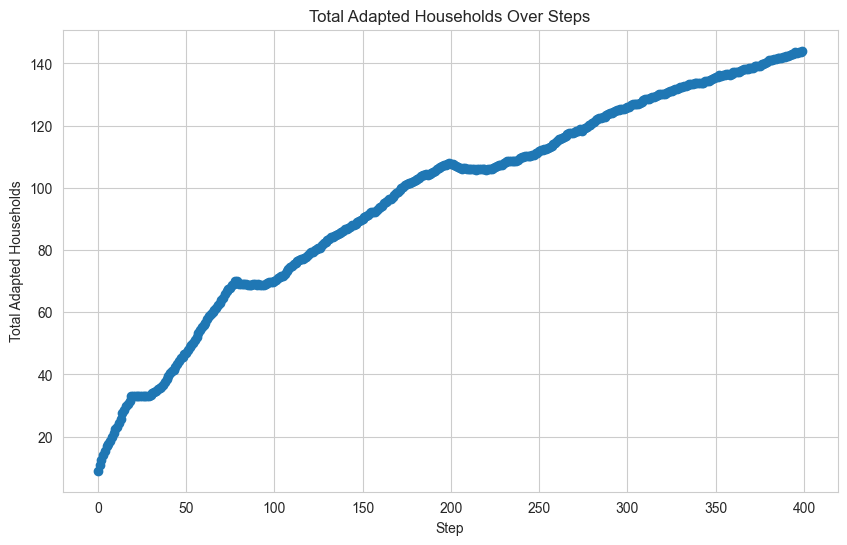

In [4]:
# upload the data with the following code
# change the file name to the file you want to load
model_dataframe_initial = pd.read_csv(f"../results/{'model_results_no_subsidy'}.csv")
agent_dataframe_initial = pd.read_csv(f"../results/{'agent_results_no_subsidy'}.csv")
print(type(model_dataframe_initial))

# Group by the "step" column and calculate the mean of "total_adapted_households" and "replication/seed"
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()

# The grouped_data DataFrame now contains the average values for each unique "step" value
print(grouped_data)


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Total Adapted Households Over Steps')

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

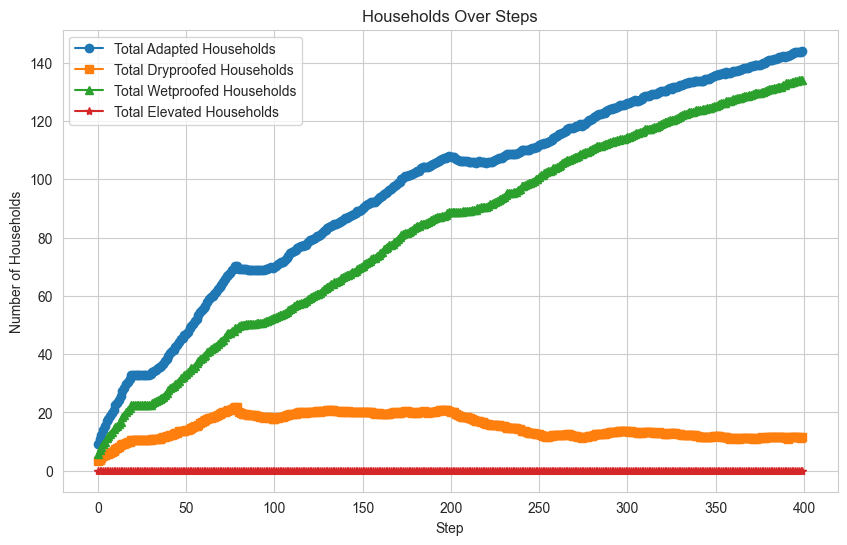

In [5]:
# Create the line chart with multiple lines
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', marker='o', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', marker='s', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', marker='^', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', marker='*', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Number of Households')
plt.title('Households Over Steps')

# Show the legend
plt.legend()

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

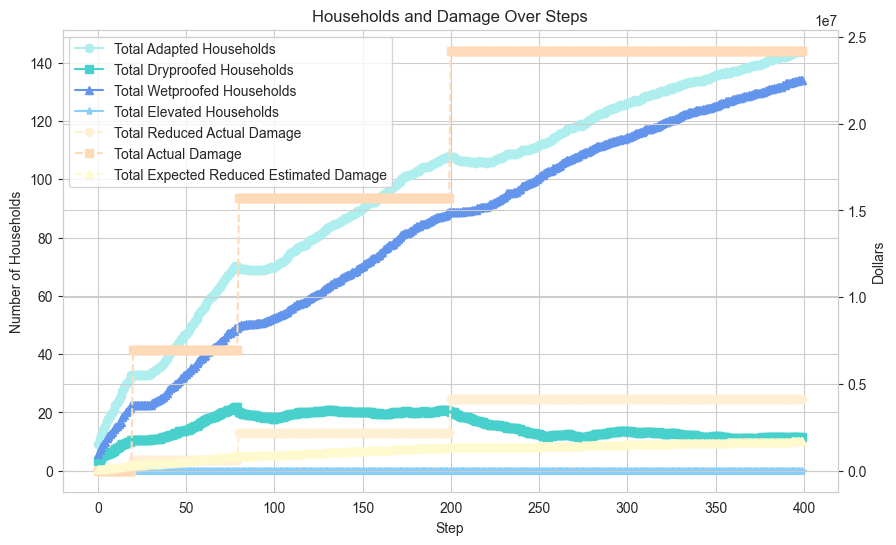

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the grouped_data DataFrame from previous code

# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', marker='o', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', marker='s', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', marker='^', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', marker='*', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', marker='o', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', marker='s', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', marker='^', linestyle='--', color=warm_colors[2])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Dollars')
plt.title('Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()

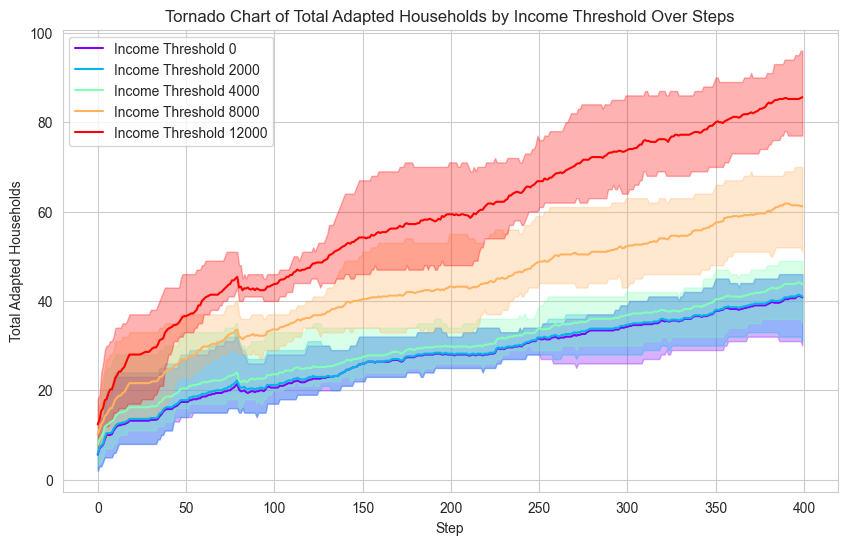

In [3]:
model_dataframe_income_threshold = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_income_threshold'}.csv")
# Group by 'Step' and 'income_threshold', then calculate the mean, min, and max for 'total_adapted_households'
grouped = model_dataframe_income_threshold.groupby(['Step', 'income_threshold'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique income_threshold values for color differentiation
income_thresholds = grouped['income_threshold'].unique()

# Create a color map to assign different colors for each income_threshold
color_map = plt.cm.rainbow(np.linspace(0, 1, len(income_thresholds)))

plt.figure(figsize=(10, 6))

# Plot each income_threshold in different colors
for income_threshold, color in zip(income_thresholds, color_map):
    # Subset the DataFrame for the current income_threshold
    subset = grouped[grouped['income_threshold'] == income_threshold]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Income Threshold {income_threshold}', color=color)

    # Create the shadow area for the same income_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Income Threshold Over Steps')
plt.legend()
plt.show()

In [ ]:
# upload the data with the following code
model_dataframe_initial = pd.read_csv(f"../result_sensitivity/{'model_results_initial'}.csv")

grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon', 'Pink']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', linestyle='--', color=warm_colors[2])
ax2.plot(grouped_data['Step'], grouped_data['total_subsidy'], label='Total Subsidy', linestyle='--', color=warm_colors[3])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Dollars')
plt.title('Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()